In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr

In [13]:
from lightgbm.sklearn import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [14]:
base_path = 'new_file/'
samsung_new = pd.read_csv(base_path + 'samsung_new.csv')
celltrion_new = pd.read_csv(base_path + 'celltrion_new.csv')
kakao_new = pd.read_csv(base_path + 'kakao_new.csv')
naver_new = pd.read_csv(base_path + 'naver_new.csv')
skhynix_new = pd.read_csv(base_path + 'skhynix_new.csv')

In [15]:
def instract_files(file): # 2010녀ㄴ
    file.columns = ['Date','G_Val','F_Val','F_total','F_percen']
    file = file.loc[3065:518:-1,:,]
    file.index = file['Date']
    file.drop(columns=['Date'],inplace=True)
    return file

samsung_new = instract_files(samsung_new)
celltrion_new = instract_files(celltrion_new)
kakao_new = instract_files(kakao_new)
naver_new = instract_files(naver_new)
skhynix_new = instract_files(skhynix_new)

/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_3615/2616876246.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file.drop(columns=['Date'],inplace=True)
/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_3615/2616876246.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file.drop(columns=['Date'],inplace=True)
/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_3615/2616876246.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [16]:
train_path = 'train/'
kospi_train = pd.read_csv(train_path + 'kospi_train.csv') # kospi (2549)
celltrion_train = pd.read_csv(train_path + 'celltrion_train.csv') # celltrion (2548)
kakao_train = pd.read_csv(train_path + 'kakao_train.csv') # kakao (2548)
naver_train = pd.read_csv(train_path + 'naver_train.csv') # naver (2548)
samsung_train = pd.read_csv(train_path + 'samsung_train.csv') # samsung (2548)
skhynix_train = pd.read_csv(train_path + 'skhynix_train.csv') # skhynix (2548)
us_3MT_train = pd.read_csv(train_path + 'us_3MT_train.csv') # 미국채 3개월 금리 (3086)
us_2YT_train  = pd.read_csv(train_path + 'us_2YT_train.csv') # 미국채 2년 금리 (3070)
us_10YT_train = pd.read_csv(train_path + 'us_10YT_train.csv') # 미국채 10년 금리 (3013)
kr_2YT_train = pd.read_csv(train_path + 'kr_2YT_train.csv') # 한국채 2년 금리 (3062)
kr_10YT_train = pd.read_csv(train_path + 'kr_10YT_train.csv') # 한국채 10년 금리 (3062)
wti_train = pd.read_csv(train_path + 'wti_train.csv') # wti 유가 선물 (2598)
gas_train = pd.read_csv(train_path + 'gas_train.csv') # 천연 가스 선물 (2595)
gold_train = pd.read_csv(train_path + 'gold_train.csv') # 금 선물 (2544)
copper_train = pd.read_csv(train_path + 'copper_train.csv') # 구리 선물 (2538)
usd_index_train = pd.read_csv(train_path + 'usd_index_train.csv') # 달러 지수 선물 (2662)
usd_krw_train = pd.read_csv(train_path + 'usd_krw_train.csv') # 달러/원화 환율 (2694)
usd_jpy_train = pd.read_csv(train_path + 'usd_jpy_train.csv') # 달러/엔화 환율 (2694)
usd_cny_train = pd.read_csv(train_path + 'usd_cny_train.csv') # 달러/위안화 환율 (2694)
dow_train = pd.read_csv(train_path + 'dow_train.csv') # 다우 존스 지수 (2598)
snp_train = pd.read_csv(train_path + 'snp_train.csv') # snp 500 지수 (2598)
nasdaq_train = pd.read_csv(train_path + 'nasdaq_train.csv') # nasdaq 지수 (2598)
hk_train = pd.read_csv(train_path + 'hk_train.csv') # 항셍 지수 (2147)
csi_train = pd.read_csv(train_path + 'csi_train.csv') # csi300 지수 (2511)

In [35]:
kospi_test = fdr.DataReader('KS11','2020-05-04','2020-05-30') # kospi
celltrion_test = fdr.DataReader('068270','2020-05-04','2020-05-30') # celltrion
kakao_test = fdr.DataReader('035720','2020-05-04','2020-05-30') # kakao
naver_test = fdr.DataReader('035420','2020-05-04','2020-05-30') # naver
samsung_test = fdr.DataReader('005930','2020-05-04','2020-05-30') # samsung
skhynix_test = fdr.DataReader('000660','2020-05-04','2020-05-30') # skhynix
###------------------------------------------------------------------------------------------###
us_3MT_test = fdr.DataReader('US3MT=X','2020-05-04','2020-05-30') # 미국채 3개월 금리
us_2YT_test = fdr.DataReader('US2YT=X','2020-05-04','2020-05-30') # 미국채 2년 금리
us_10YT_test = fdr.DataReader('US10YT=X','2020-05-04','2020-05-30') # 미국채 10년 금리
kr_2YT_test = fdr.DataReader('KR10YT=RR','2020-05-04','2020-05-30') # 한국채 2년 금리
kr_10YT_test = fdr.DataReader('KR10YT=RR','2020-05-04','2020-05-30') # 한국채 10년 금리
wti_test = fdr.DataReader('CL','2020-05-04','2020-05-30') # wti 유가 선물
gas_test = fdr.DataReader('NG','2020-05-04','2020-05-30') # 천연 가스 선물
gold_test = fdr.DataReader('ZG','2020-05-04','2020-05-30') # 금 선물
copper_test = fdr.DataReader('HG','2020-05-04','2020-05-30') # 구리 선물
usd_index_test = fdr.DataReader('DX','2020-05-04','2020-05-30') # 달러 지수 선물
usd_krw_test = fdr.DataReader('USD/KRW','2020-05-04','2020-05-30') # 달러/원화 환율
usd_jpy_test = fdr.DataReader('USD/JPY','2020-05-04','2020-05-30') # 달러/엔화 환율
usd_cny_test = fdr.DataReader('USD/CNY','2020-05-04','2020-05-30') # 달러/위안화 환율
dow_test = fdr.DataReader('DJI','2020-05-04','2020-05-30') # 다우 존스 지수
snp_test = fdr.DataReader('US500','2020-05-04','2020-05-30') # snp 500 지수
nasdaq_test = fdr.DataReader('IXIC','2020-05-04','2020-05-30') # nasdaq 지수
hk_test = fdr.DataReader('HK50','2020-05-04','2020-05-30') # 항셍 지수
csi_test = fdr.DataReader('csi300','2020-05-04','2020-05-30') # csi300

ValueError: No tables found

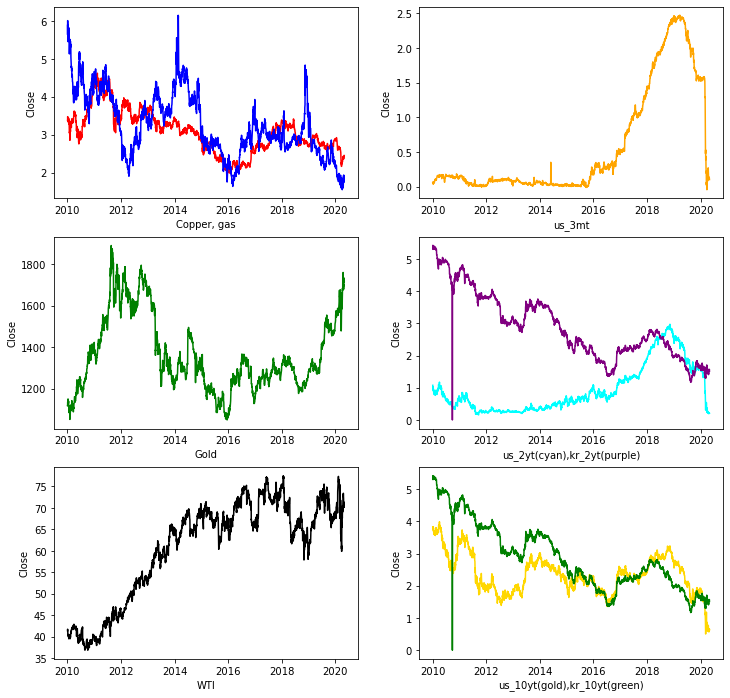

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(321)
sns.lineplot(x=copper_train.index,y = copper_train['Close'], color='r')
sns.lineplot(x=gas_train.index,y = gas_train['Close'], color = 'b')
plt.xlabel('Copper, gas')
plt.subplot(323)
sns.lineplot(x=gold_train.index,y = gold_train['Close'], color = 'g')
plt.xlabel('Gold')
plt.subplot(325)
sns.lineplot(x=wti_train.index,y = wti_train['Close'], color = 'black')
plt.xlabel('WTI')
plt.subplot(322)
sns.lineplot(x=us_3MT_train.index,y = us_3MT_train['Close'], color = 'orange')
plt.xlabel('us_3mt')
plt.subplot(324)
sns.lineplot(x=us_2YT_train.index,y = us_2YT_train['Close'], color = 'cyan')
sns.lineplot(x=kr_2YT_train.index,y = kr_2YT_train['Close'], color = 'purple')
plt.xlabel('us_2yt(cyan),kr_2yt(purple)')
plt.subplot(326)
sns.lineplot(x=us_10YT_train.index,y = us_10YT_train['Close'], color = 'gold')
sns.lineplot(x=kr_10YT_train.index,y = kr_10YT_train['Close'], color = 'green')
plt.xlabel('us_10yt(gold),kr_10yt(green)')
plt.show()

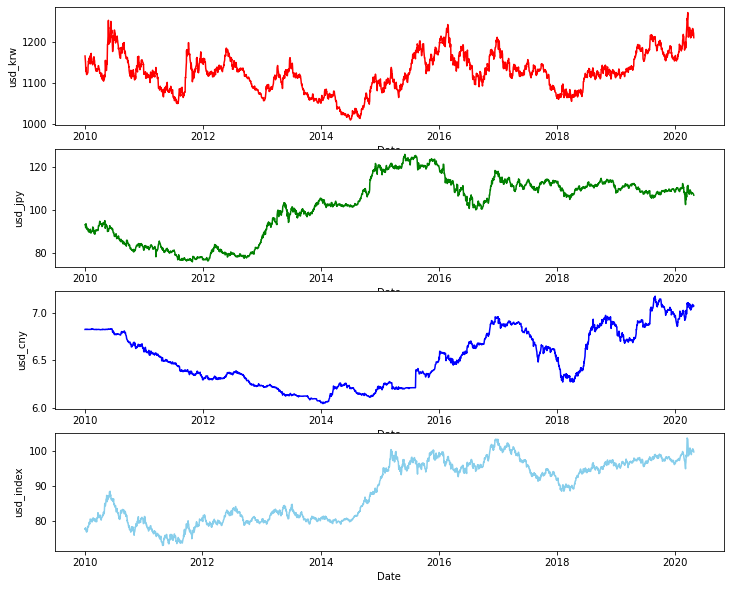

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(411)
plt.ylabel('usd_krw')
sns.lineplot(x=usd_krw_train.index,y = usd_krw_train['Close'], color='r')
plt.subplot(412)
plt.ylabel('usd_jpy')
sns.lineplot(x=usd_jpy_train.index,y = usd_jpy_train['Close'], color = 'g')
plt.subplot(413)
plt.ylabel('usd_cny')
sns.lineplot(x=usd_cny_train.index,y = usd_cny_train['Close'], color = 'b')
plt.subplot(414)
plt.ylabel('usd_index')
sns.lineplot(x=usd_index_train.index,y = usd_index_train['Close'], color = 'skyblue')
plt.show()

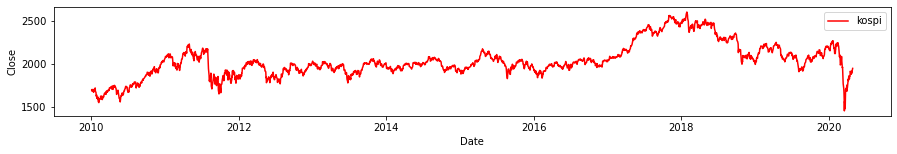

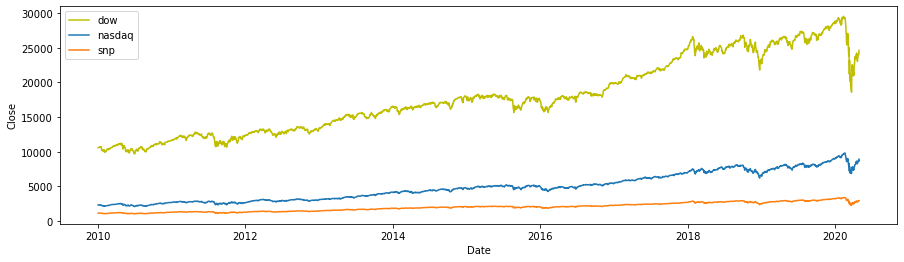

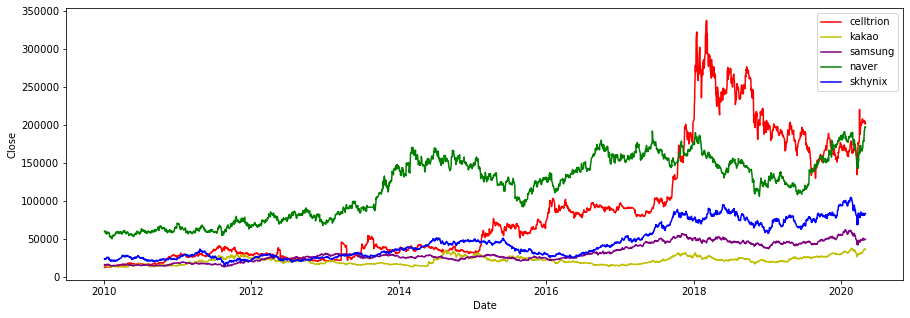

In [ ]:
plt.figure(figsize=(15,2))
sns.lineplot(x = kospi_train.index, y = kospi_train.Close, color= 'r', label='kospi')
plt.show()
plt.figure(figsize=(15,4))
sns.lineplot(x = dow_train.index, y = dow_train.Close, color = 'y',label='dow')
sns.lineplot(x = nasdaq_train.index, y = nasdaq_train.Close, label='nasdaq')
sns.lineplot(x = snp_train.index, y = snp_train.Close, label='snp')
plt.show()
plt.figure(figsize=(15,5))
sns.lineplot(x = celltrion_train.index, y = celltrion_train.Close,color='r', label='celltrion')
sns.lineplot(x = kakao_train.index, y = kakao_train.Close, color='y', label='kakao')
sns.lineplot(x = samsung_train.index, y = samsung_train.Close,color='purple', label='samsung')
sns.lineplot(x = naver_train.index, y = naver_train.Close, color='g', label='naver')
sns.lineplot(x = skhynix_train.index, y = skhynix_train.Close,color='b', label='skhynix')
plt.show()

In [ ]:
kospi_t = pd.merge(kospi_train['Close'],dow_train.Open,left_index=True,right_index=True,how='left')
kospi_t = pd.merge(kospi_t,snp_train.Open,left_index=True,right_index=True,how='left')
kospi_t = pd.merge(kospi_t,csi_train.Open,left_index=True,right_index=True,how='left')
kospi_t = pd.merge(kospi_t,hk_train.Open,left_index=True,right_index=True,how='left')
kospi_t = pd.merge(kospi_t,usd_krw_train.Close,left_index=True,right_index=True,how='left')
kospi_t = pd.merge(kospi_t,usd_index_train.Open,left_index=True,right_index=True,how='left')
kospi_t = pd.merge(kospi_t,usd_cny_train.Open,left_index=True,right_index=True,how='left')
kospi_t = pd.merge(kospi_t,gold_train.Open,left_index=True,right_index=True,how='left')
kospi_t = pd.merge(kospi_t,wti_train.Open,left_index=True,right_index=True,how='left')
kospi_t = pd.merge(kospi_t,copper_train.Open,left_index=True,right_index=True,how='left')
kospi_t = pd.merge(kospi_t,gas_train.Open,left_index=True,right_index=True,how='left')
kospi_t = pd.merge(kospi_t,kr_10YT_train.Close,left_index=True,right_index=True,how='left')
kospi_t = pd.merge(kospi_t,us_3MT_train.Open,left_index=True,right_index=True,how='left')
kospi_t = pd.merge(kospi_t,us_10YT_train.Open,left_index=True,right_index=True,how='left')
kospi_t.columns = ['Target','Dow','Snp','Csi','Hk','Usd_krw','Usd_index','Usd_cny','Gold','Wti','Copper','Gas','Kr_10YT','Us_3MT','Us_10YT']
kospi_t.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2549 entries, 2010-01-04 to 2020-04-29
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Target     2549 non-null   float64
 1   Dow        2471 non-null   float64
 2   Snp        2471 non-null   float64
 3   Csi        2427 non-null   float64
 4   Hk         2068 non-null   float64
 5   Usd_krw    2549 non-null   float64
 6   Usd_index  2532 non-null   float64
 7   Usd_cny    2549 non-null   float64
 8   Gold       2420 non-null   float64
 9   Wti        2471 non-null   float64
 10  Copper     2409 non-null   float64
 11  Gas        2469 non-null   float64
 12  Kr_10YT    2548 non-null   float64
 13  Us_3MT     2531 non-null   float64
 14  Us_10YT    2528 non-null   float64
dtypes: float64(15)
memory usage: 383.2 KB


/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_1497/3518563252.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Open_x'} in the result is deprecated and will raise a MergeError in a future version.
  kospi_t = pd.merge(kospi_t,hk_train.Open,left_index=True,right_index=True,how='left')
/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_1497/3518563252.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Open_x'} in the result is deprecated and will raise a MergeError in a future version.
  kospi_t = pd.merge(kospi_t,usd_cny_train.Open,left_index=True,right_index=True,how='left')
/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_1497/3518563252.py:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Open_x'} in the result is deprecated and will raise a MergeError in a future version.
  kospi_t = pd.merge(kospi_t,wti_train.Open,left_index=True,right_index=True,how='left')
/var/folders/l3/r5rtf2n15dv3t45

In [ ]:
kospi_t = kospi_t.drop(kospi_t[kospi_t['Dow'].isnull()].index)
kospi_t = kospi_t.drop(kospi_t[kospi_t['Usd_index'].isnull()].index)
kospi_t = kospi_t.drop(kospi_t[kospi_t['Usd_cny'].isnull()].index)
kospi_t = kospi_t.drop(kospi_t[kospi_t['Gold'].isnull()].index)
kospi_t = kospi_t.drop(kospi_t[kospi_t['Kr_10YT'].isnull()].index)
kospi_t = kospi_t.drop(kospi_t[kospi_t['Copper'].isnull()].index)
kospi_t = kospi_t.drop(kospi_t[kospi_t['Wti'].isnull()].index)
kospi_t = kospi_t.drop(kospi_t[kospi_t['Gas'].isnull()].index)
kospi_t = kospi_t.drop(kospi_t[kospi_t['Us_3MT'].isnull()].index)
kospi_t = kospi_t.drop(kospi_t[kospi_t['Us_10YT'].isnull()].index)
kospi_t = kospi_t.drop(kospi_t[kospi_t['Csi'].isnull()].index)
kospi_t_hk = kospi_t.drop(kospi_t[kospi_t['Hk'].isnull()].index)
kospi_t.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2227 entries, 2010-01-04 to 2020-04-29
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Target     2227 non-null   float64
 1   Dow        2227 non-null   float64
 2   Snp        2227 non-null   float64
 3   Csi        2227 non-null   float64
 4   Hk         1841 non-null   float64
 5   Usd_krw    2227 non-null   float64
 6   Usd_index  2227 non-null   float64
 7   Usd_cny    2227 non-null   float64
 8   Gold       2227 non-null   float64
 9   Wti        2227 non-null   float64
 10  Copper     2227 non-null   float64
 11  Gas        2227 non-null   float64
 12  Kr_10YT    2227 non-null   float64
 13  Us_3MT     2227 non-null   float64
 14  Us_10YT    2227 non-null   float64
dtypes: float64(15)
memory usage: 342.9 KB


In [ ]:
kospi_tst = pd.merge(kospi_test['Close'],dow_test.Open,left_index=True,right_index=True,how='left')
kospi_tst = pd.merge(kospi_tst,snp_test.Open,left_index=True,right_index=True,how='left')
kospi_tst = pd.merge(kospi_tst,csi_test.Open,left_index=True,right_index=True,how='left')
kospi_tst = pd.merge(kospi_tst,hk_test.Open,left_index=True,right_index=True,how='left')
kospi_tst = pd.merge(kospi_tst,usd_krw_test.Close,left_index=True,right_index=True,how='left')
kospi_tst = pd.merge(kospi_tst,usd_index_test.Open,left_index=True,right_index=True,how='left')
kospi_tst = pd.merge(kospi_tst,usd_cny_test.Open,left_index=True,right_index=True,how='left')
kospi_tst = pd.merge(kospi_tst,gold_test.Open,left_index=True,right_index=True,how='left')
kospi_tst = pd.merge(kospi_tst,wti_test.Open,left_index=True,right_index=True,how='left')
kospi_tst = pd.merge(kospi_tst,copper_test.Open,left_index=True,right_index=True,how='left')
kospi_tst = pd.merge(kospi_tst,gas_test.Open,left_index=True,right_index=True,how='left')
kospi_tst = pd.merge(kospi_tst,kr_10YT_test.Close,left_index=True,right_index=True,how='left')
kospi_tst = pd.merge(kospi_tst,us_3MT_test.Open,left_index=True,right_index=True,how='left')
kospi_tst = pd.merge(kospi_tst,us_10YT_test.Open,left_index=True,right_index=True,how='left')
kospi_tst.columns = ['Target','Dow','Snp','Csi','Hk','Usd_krw','Usd_index','Usd_cny','Gold','Wti','Copper','Gas','Kr_10YT','Us_3MT','Us_10YT']
kospi_tst.fillna(method='ffill',inplace=True)
kospi_tst.fillna(method='bfill',inplace=True)
kospi_tst.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 2020-05-04 to 2020-09-29
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Target     105 non-null    float64
 1   Dow        105 non-null    float64
 2   Snp        105 non-null    float64
 3   Csi        105 non-null    float64
 4   Hk         105 non-null    float64
 5   Usd_krw    105 non-null    float64
 6   Usd_index  105 non-null    float64
 7   Usd_cny    105 non-null    float64
 8   Gold       105 non-null    float64
 9   Wti        105 non-null    float64
 10  Copper     105 non-null    float64
 11  Gas        105 non-null    float64
 12  Kr_10YT    105 non-null    float64
 13  Us_3MT     105 non-null    float64
 14  Us_10YT    105 non-null    float64
dtypes: float64(15)
memory usage: 17.2 KB


/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_1497/2509220859.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Open_x'} in the result is deprecated and will raise a MergeError in a future version.
  kospi_tst = pd.merge(kospi_tst,hk_test.Open,left_index=True,right_index=True,how='left')
/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_1497/2509220859.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Open_x'} in the result is deprecated and will raise a MergeError in a future version.
  kospi_tst = pd.merge(kospi_tst,usd_cny_test.Open,left_index=True,right_index=True,how='left')
/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_1497/2509220859.py:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Open_x'} in the result is deprecated and will raise a MergeError in a future version.
  kospi_tst = pd.merge(kospi_tst,wti_test.Open,left_index=True,right_index=True,how='left')
/var/folders/l3/r5rtf2

<AxesSubplot:>

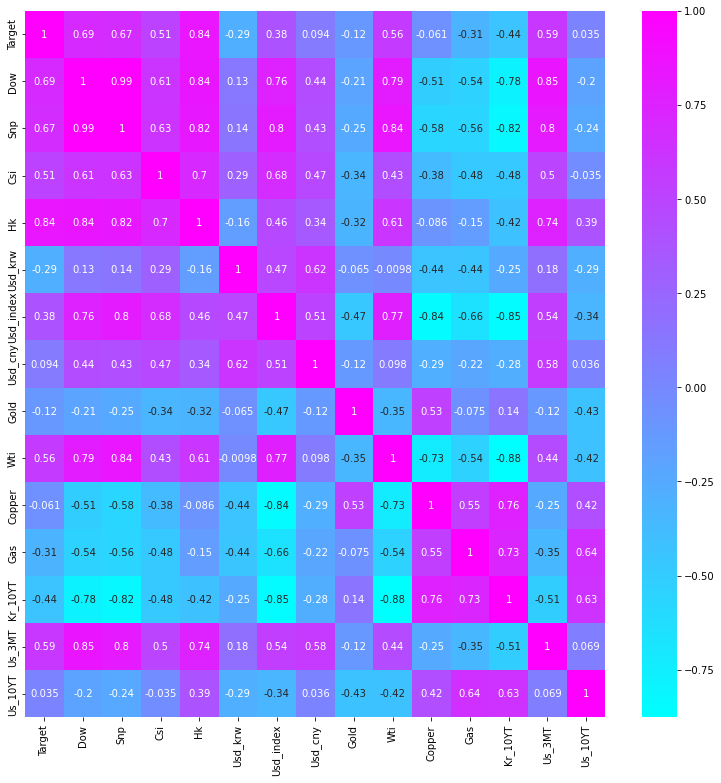

In [ ]:
plt.figure(figsize=(13,13))
sns.heatmap(kospi_t.corr(),annot=True, cmap='cool')

In [ ]:
kospi_t.Usd_index = kospi_t.Usd_index*10
kospi_t.Usd_cny =  kospi_t.Usd_cny*100
kospi_t.Wti =  kospi_t.Wti*30
kospi_t.Copper = kospi_t.Copper*500
kospi_t.Gas = kospi_t.Gas*200
kospi_t.Kr_10YT = kospi_t.Kr_10YT*300
kospi_t.Us_3MT = kospi_t.Us_3MT*20000
kospi_t.Us_10YT = kospi_t.Us_10YT*1000

In [ ]:
kospi_tst.Usd_index = kospi_tst.Usd_index*10
kospi_tst.Usd_cny =  kospi_tst.Usd_cny*100
kospi_tst.Wti =  kospi_tst.Wti*30
kospi_tst.Copper = kospi_tst.Copper*500
kospi_tst.Gas = kospi_tst.Gas*200
kospi_tst.Kr_10YT = kospi_tst.Kr_10YT*300
kospi_tst.Us_3MT = kospi_tst.Us_3MT*20000
kospi_tst.Us_10YT = kospi_tst.Us_10YT*1000

In [ ]:
trainX = kospi_t.drop(columns=['Target','Usd_krw','Gold','Gas','Kr_10YT','Us_3MT','Us_10YT','Hk'])
trainy = kospi_t['Target']
testX = kospi_tst.drop(columns=['Target','Usd_krw','Gold','Gas','Kr_10YT','Us_3MT','Us_10YT','Hk'])
testy = kospi_tst['Target']
print(trainX.shape,trainy.shape,testX.shape,testy.shape)

(2227, 7) (2227,) (105, 7) (105,)


In [ ]:
model = LGBMRegressor(max_depth=5,num_leaves=6)
model2 = LinearRegression()
model.fit(trainX,trainy)
model2.fit(trainX,trainy)
pred = model.predict(testX)
pred2 = model2.predict(testX)
print('-----------------------------------------------------------')
print(mean_squared_error(testy,pred))
print(mean_absolute_error(testy,pred))
print(r2_score(testy,pred))
print('-----------------------------------------------------------')
print(mean_squared_error(testy,pred2))
print(mean_absolute_error(testy,pred2))
print(r2_score(testy,pred2))

-----------------------------------------------------------
5990.603670440967
62.061335659424714
0.7389831243522262
-----------------------------------------------------------
3771.36379041548
50.00190449103743
0.8356777300487092


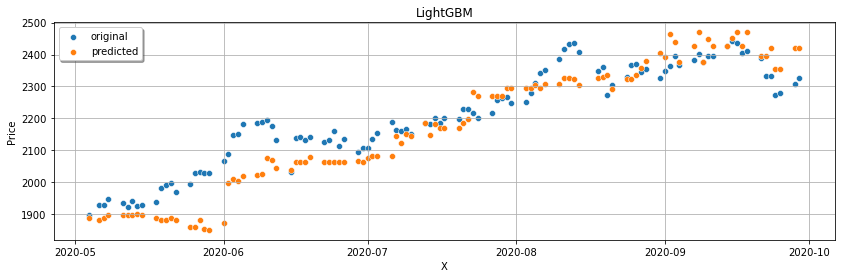

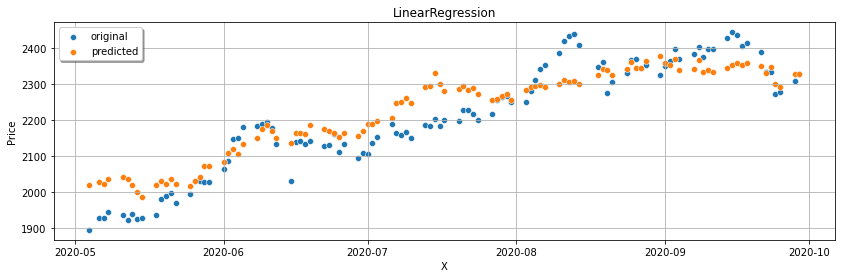

In [ ]:
x_ax = testX.index
plt.figure(figsize=(14, 4))
plt.title("LightGBM")
sns.scatterplot(x=x_ax, y=testy, label="original")
sns.scatterplot(x=x_ax, y=pred, label="predicted")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
plt.figure(figsize=(14, 4))
sns.scatterplot(x=x_ax, y=testy, label="original")
sns.scatterplot(x=x_ax, y=pred2, label="predicted")
plt.title("LinearRegression")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()